# Infectious Disease Dynamics: ODE models

This notebook presents the ODE models from the second lecture of the course [Infectious Disease Dynamics](https://moodle-app2.let.ethz.ch/course/view.php?id=14325) at ETH. It aims to provide some intuition about all the parameters in the different models.
Author of the notebook: V. Semenov

## Usage
First run all the cells to get a bit familiar with the content of the notebook. Then, change the initial conditions "initial_values" or the parameters "params" of any of the presented models. To execute a single modified cell press **Esc** first and then **Shift** + **Enter**.

In [1]:
# Remove this once successfully installed (please report if something is missing)

using Pkg
Pkg.add("DifferentialEquations")
Pkg.add("GR")
Pkg.build("GR")
Pkg.add("Plots")


   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %1.0 %Fetching: [=========================>               ]  61.8 %

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
   Building GR → `~/.julia/packages/GR/9Vi4m/deps/build.log`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [2]:
# Import the needed modules (this may take a couple of seconds)
using DifferentialEquations
using Plots
gr()

Plots.GRBackend()

## SI Model (Lecture 2, slide 3/45)

$\frac{dS}{dt} = \Lambda - \delta_{S}S - \beta S I \\
\frac{dI}{dt} = \beta S I - \delta_{I} I $ <br>
with $S$ susceptibles and $I$ infecteds (densities), $\Lambda$ birth/immigration rate, $\beta$ transmission rate, and $\delta_{S}$ & $\delta_{I}$ death rates.

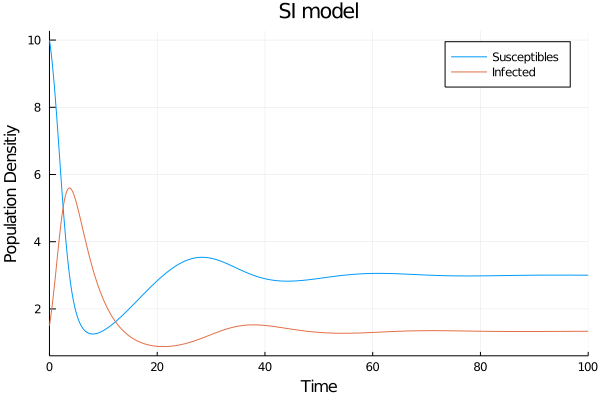

In [3]:
function SI_model!(du, u, p, t)
    # initial values
    S, I = u
    # parameters in this order
    Λ, β, δs, δi = p
    # system of odes
    du[1] = Λ - δs - β*S*I
    du[2] = β*S*I - δi*I
end

tspan = (0.0, 100.0) 
initial_values = [10.0, 1.5]
params = [0.5, 0.1, 0.1, 0.3]

SI = ODEProblem(SI_model!, initial_values, tspan, params)
SI_sol = solve(SI)

plot(SI_sol, title = "SI model", xlabel = "Time", ylabel = "Population Densitiy",
    labels = ["Susceptibles" "Infected"])

## SIR Model (Lecture 2, slide 14/45)

$\frac{dS}{dt} = \Lambda - \delta_{S}S - \beta S I \\
\frac{dI}{dt} = \beta S I - \delta_{I} I \\
\frac{dR}{dt} = r I - \delta_{R} R$ <br>
with $S$ susceptibles, $I$ infecteds and $R$ recovereds (densities), <br>
$\Lambda$ birth/immigration rate, $\beta$ transmission rate, $\delta_{S}$, $\delta_{I}$ & $\delta_{R}$ death rates, and $r$ recovery rate.

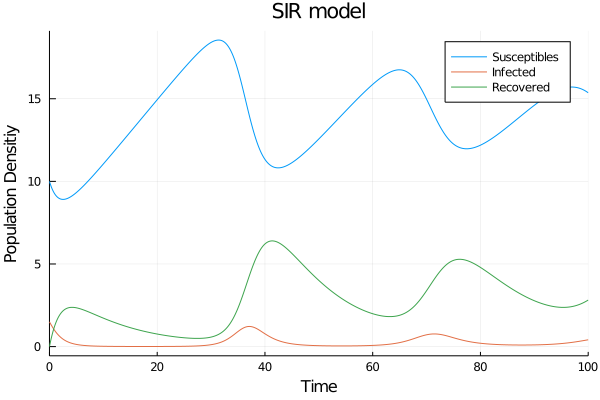

In [4]:
function SIR_model!(du, u, p, t)
    # initial values
    S, I, R = u
    # parameters in this order
    Λ, β, δs, δi, δr, r = p
    # system of odes
    du[1] = Λ - δs - β*S*I
    du[2] = β*S*I - δi*I - r*I
    du[3] = r*I - δr*R
end

tspan = (0.0, 100.0)
initial_values = [10.0, 1.5, 0.0]
params = [0.5, 0.1, 0.1, 0.3, 0.09, 1.1]

SIR = ODEProblem(SIR_model!, initial_values, tspan, params)
SIR_sol = solve(SIR)

plot(SIR_sol, title = "SIR model", xlabel = "Time", ylabel = "Population Densitiy",
    labels = ["Susceptibles" "Infected" "Recovered"])

## SIRS Model (Lecture 2, slide 22/45)

$\frac{dS}{dt} = \Lambda - \delta_{S}S - \beta S I + q R\\
\frac{dI}{dt} = \beta S I - \delta_{I} I \\
\frac{dR}{dt} = r I - \delta_{R} R - q R$ <br>
with $S$ susceptibles, $I$ infecteds and $R$ recovereds (densities), <br>
$\Lambda$ birth/immigration rate, $\beta$ transmission rate, $\delta_{S}$, $\delta_{I}$ & $\delta_{R}$ death rates, $r$ recovery rate and $q$ rate of loss of immunity.

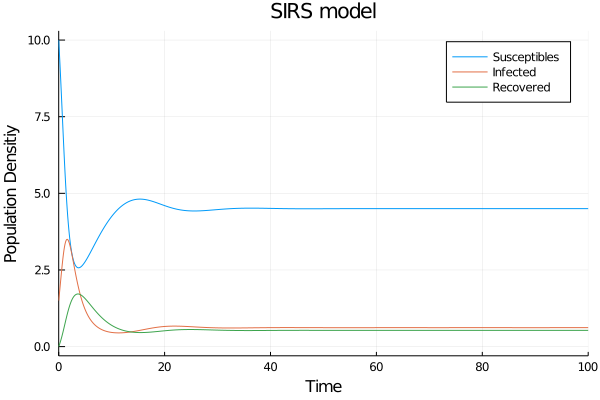

In [5]:
function SIRS_model!(du, u, p, t)
    # initial values
    S, I, R = u
    # parameters in this order
    Λ, β, δs, δi, δr, r, q = p
    # system of odes
    du[1] = Λ - δs*S - β*S*I + q*R
    du[2] = β*S*I - δi*I - r*I
    du[3] = r*I - δr*R - q*R
end

tspan = (0.0, 100.0)
initial_values = [10.0, 1.5, 0.0]
params = [0.9, 0.2, 0.1, 0.6, 0.15, 0.3, 0.2]

SIRS = ODEProblem(SIRS_model!, initial_values, tspan, params)
SIRS_sol = solve(SIRS)

plot(SIRS_sol, title = "SIRS model", xlabel = "Time", ylabel = "Population Densitiy",
    labels = ["Susceptibles" "Infected" "Recovered"])

## SEI Model (Lecture 2, slide 29/45)

$\frac{dS}{dt} = (b - \delta - \gamma N) S - \beta S I\\
\frac{dE}{dt} = \beta S I - (\sigma + \delta +\gamma N) E \\
\frac{dI}{dt} = \sigma E - (\delta + \delta_{I} + \gamma N) I$ <br>
with $S$ susceptibles, $I$ infecteds and $E$ exposeds (densities), <br>
$N$ total population size, $b$ average capita birth rate, $\beta$ transmission rate, $\delta$ & $\delta_{I}$ death rates, <br>
$K = (b - \delta) / \gamma$ carrying capacity, and $1/\sigma$ duration of latency period.

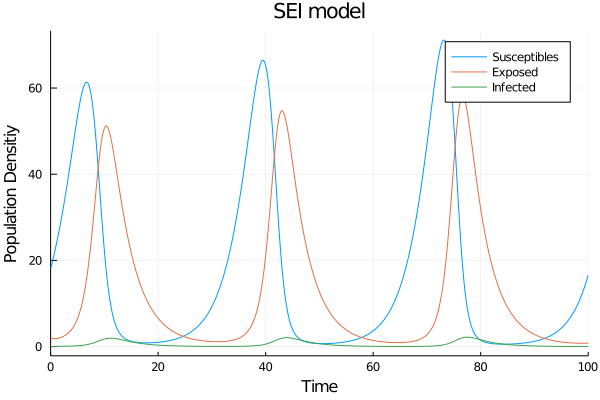

In [6]:
function SEI_model!(du, u, p, t)
    # initial values
    S, E, I = u
    # params
    N = S + E + I
    b, β, δ, δi, γ, σ = p
    # system of odes
    du[1] = (b - δ - γ*N)*S - β*S*I
    du[2] = β*S*I - (σ + δ + γ*N)*E
    du[3] = σ*E - (δ + δi + γ*N)*I
end

tspan = (0.0, 100.0)
initial_values = [18.0, 2.0, 0.0]
params = [0.5, 0.5, 0.2, 0.98, 0.001, 0.05]

SEI = ODEProblem(SEI_model!, initial_values, tspan, params)
SEI_sol = solve(SEI)

plot(SEI_sol, title = "SEI model", xlabel = "Time", ylabel = "Population Densitiy",
    labels = ["Susceptibles" "Exposed" "Infected"])

## SEIR Model (Lecture 2, slide 36/45)

$\frac{dS}{dt} = \Lambda - \delta S - \beta(t) S I\\
\frac{dE}{dt} = \beta(t) S I - (\delta + \sigma) E \\
\frac{dI}{dt} = \sigma E - (\delta + r) I \\
\frac{dR}{dt} = r I - \delta R$ <br>
with $S$ susceptibles, $I$ infecteds, $E$ exposeds and $R$ recovereds (densities), <br>
$\Lambda$ birth rate, $\delta$ death rate, $\beta(t)$ timedependent transmission / infectivity rate, <br>
$\sigma$ progression rate and $r$ recovery rate.

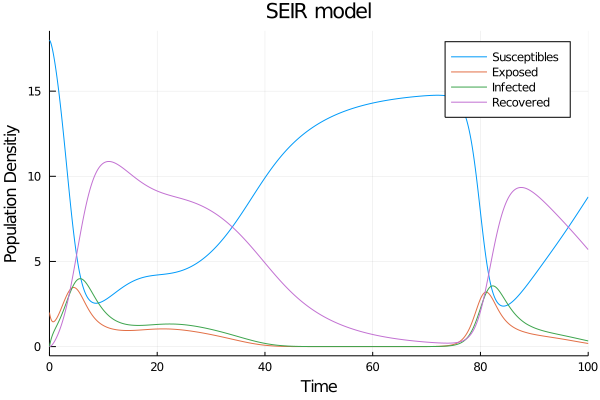

In [7]:
function SEIR_model!(du, u, p, t)
    # initial values
    S, E, I, R = u
    # params
    Λ, β_factor, δ, σ, r = p
    # example of periodic infectivity rate dependent on time
    β(t) = β_factor*(sin(0.1*t)+1)
    # system of odes
    du[1] = Λ - δ*S - β(t)*S*I
    du[2] = β(t)*S*I - (δ + σ)*E
    du[3] = σ*E - (δ + r)*I
    du[4] = r*I - δ*R
end

tspan = (0.0, 100.0)
initial_values = [18.0, 2.0, 0.0, 0.0]
params = [1.5, 0.1, 0.1, 0.9, 0.6]

SEIR = ODEProblem(SEIR_model!, initial_values, tspan, params)
SEIR_sol = solve(SEIR)

plot(SEIR_sol, title = "SEIR model", xlabel = "Time", ylabel = "Population Densitiy",
    labels = ["Susceptibles" "Exposed" "Infected" "Recovered"])